<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/DeepLearning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

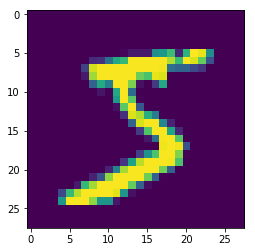

In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

3


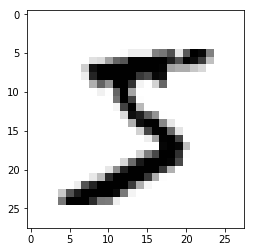

In [0]:
print(x_train.ndim)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

(90, 28, 28)
(90, 28, 28)


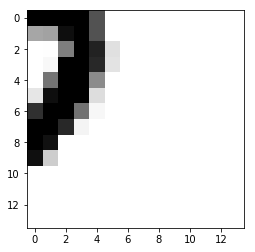

In [0]:
slice_10_100 = x_train[10:100]
print(slice_10_100.shape)

slice_10_100 = x_train[10:100, : , :]
print(slice_10_100.shape)

slice_10_100 = x_train[10:100, 14: , 14:]
plt.imshow(slice_10_100[0], cmap = plt.cm.binary)
plt.show()

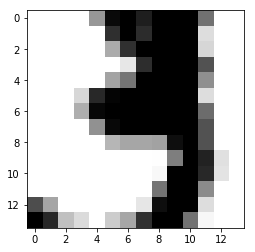

In [0]:
slice_10_100 = x_train[10:100, 7:-7 , 7:-7]
plt.imshow(slice_10_100[0], cmap = plt.cm.binary)
plt.show()

In [0]:
import math

batch_size = 128
n = math.floor(len(x_test) / 128)
print(len(x_test), n, n*128, (n+1)*128)
slice_128 = x_train[n*128:(n-1) * 128, : , :]
print(slice_128.shape)

10000 78 9984 10112
(0, 28, 28)


In [0]:
def naive_relu(x):
  assert len(x.shape) == 2
  x_relu = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x_relu [i, j] = max(x [i, j],0 )
  return x_relu
import numpy as np
#
def naive_add(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert (x.shape == y.shape)
  r = np.ndarray(shape = (2,2),dtype = np.float32)
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      r [i, j] = x[i, j] + y[i, j]
  return r

import numpy as np
#
x = np.random.random((2,2))
y = np.random.random((2,2))
x_relu = naive_relu(x)
r = naive_add(x,y)
print('x = ',r)


x =  [[1.5505027 1.2934415]
 [0.7733166 1.012955 ]]


In [0]:
x = np.random.random((2, 2))
z = np.maximum(x,0)
print(z)
a = np.random.random(1)
print(a.shape)

[[0.48476268 0.60252998]
 [0.89820741 0.4082539 ]]
(1,)


In [0]:
x = np.random.random((64, 3, 32, 1))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(z.shape, z[0,0,0,0], z[0,0,0,1], z[0,0,0,9])

(64, 3, 32, 10) 0.7099470642549515 0.9293764263273964 0.7099470642549515


In [3]:
import numpy as np
x = np.random.random(10)
y = np.random.random(10)
def naive_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape == y.shape
  z = 0.0
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

z = np.dot(x,y)
print(z, naive_dot(x,y))

2.0144531551358376 2.0144531551358376


In [9]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

x = np.random.random((3,10))
y = np.random.random(10)
z = np.dot(x,y)
print(z)  
print(naive_matrix_vector_dot(x,y))

[2.65890929 3.4968235  3.06095988]
[2.65890929 3.4968235  3.06095988]


In [10]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = np.dot(x[i,:], y)
  return z

x = np.random.random((3,10))
y = np.random.random(10)
z = np.dot(x,y)
print(z)  
print(naive_matrix_vector_dot(x,y))

[2.49698093 2.14451281 3.3604646 ]
[2.49698093 2.14451281 3.3604646 ]


In [14]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      z[i, j] = np.dot(x[i,:], y[:,j])
  return z

x = np.random.random((3, 10))
y = np.random.random((10, 2))
z = np.dot(x,y)
print(z)  
print(naive_matrix_dot(x,y))

[[4.12081142 3.0734637 ]
 [2.38967432 1.94471689]
 [2.2177791  1.72536555]]
[[4.12081142 3.0734637 ]
 [2.38967432 1.94471689]
 [2.2177791  1.72536555]]
